In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import numpy as np
from sklearn.utils import resample
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [93]:
dataset = pd.read_csv('financial_sentiment.csv')
dataset

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


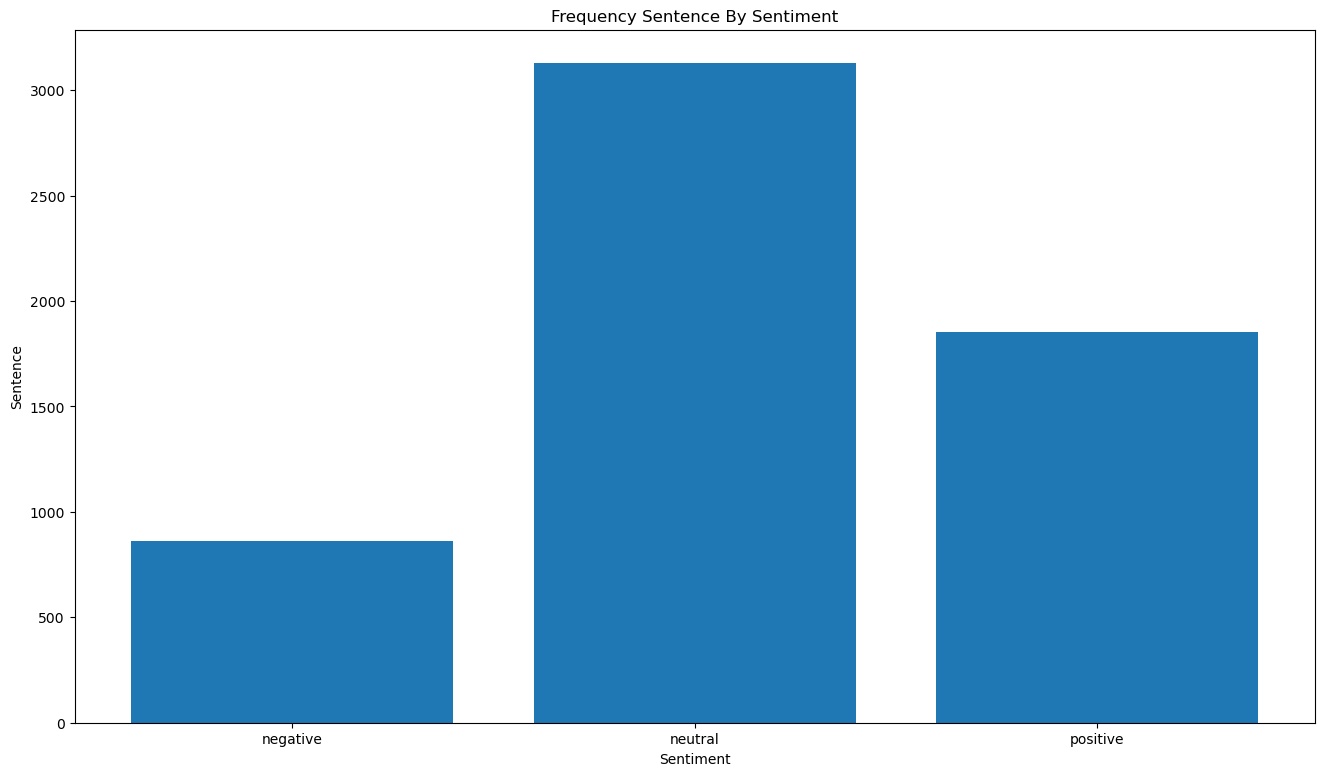

In [94]:
sentiment_counts = dataset.groupby('Sentiment')['Sentence'].count()

plt.figure(figsize=(16, 9))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Sentence')
plt.title('Frequency Sentence By Sentiment')
plt.show()


In [95]:
grouped_sentiment = dataset.groupby('Sentiment')

resampled_list = [resample(group, replace=True, n_samples=5000, random_state=0)
                  for name, group in grouped_sentiment]

dataset = pd.concat(resampled_list)

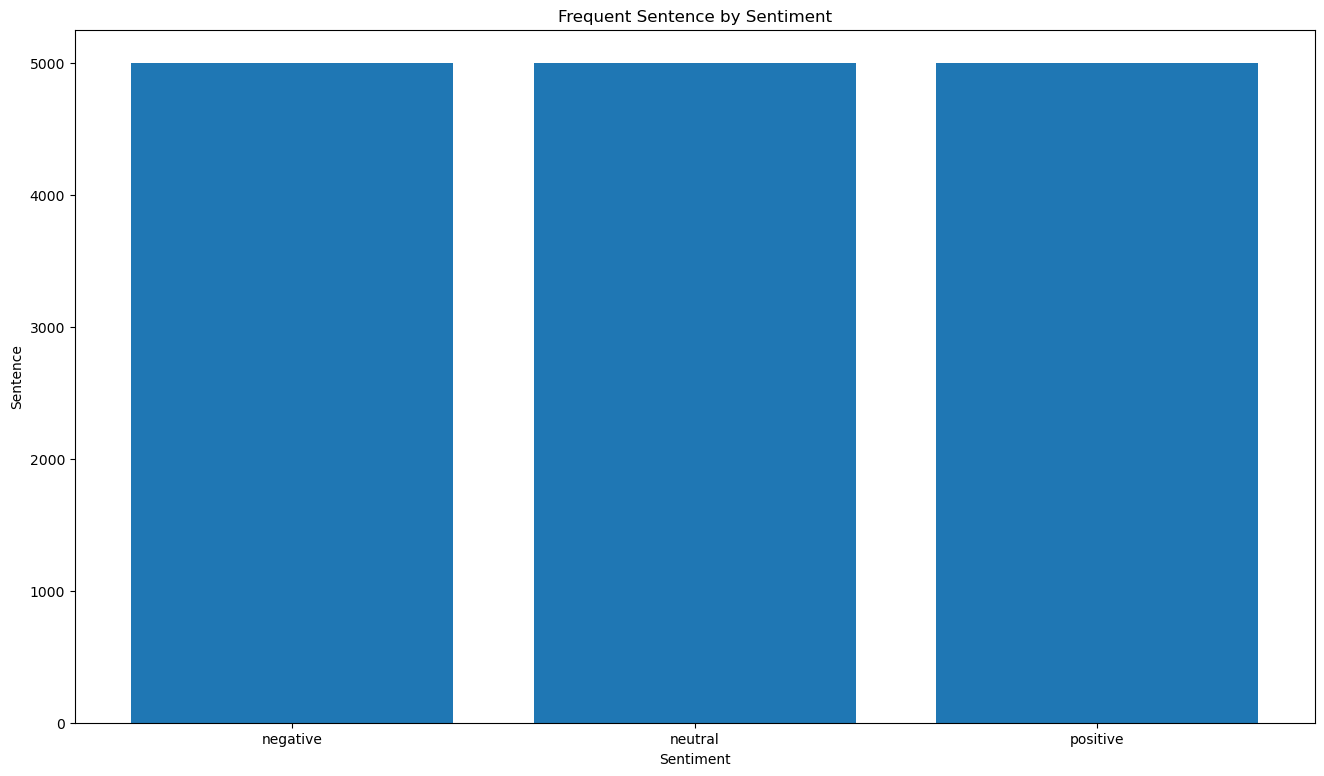

In [96]:
sentiment_counts = dataset.groupby('Sentiment')['Sentence'].count()

plt.figure(figsize=(16,9))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Sentence')
plt.title('Frequent Sentence by Sentiment')
plt.show()

In [97]:
def remove_special_characters(text):
    new_string = ''
    for character in text:
        if character.isalnum() or character.isspace():
            new_string += character
    return new_string
    
def lower_case(text):
    return text.lower()

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [98]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
dataset['Sentence'] = dataset['Sentence'].apply(remove_special_characters)
dataset['Sentence'] = dataset['Sentence'].apply(lower_case)
dataset['Sentence'] = dataset['Sentence'].apply(remove_stopwords)
dataset

,Sentence,Sentiment
4750,spy less 02 people calling bearish heading exi...,negative
3854,1201 pm omx helsinki 25 066 pct 314357 omx hel...,negative
4330,operating margin came 24 57,negative
1369,rapala vmc corporation stock exchange release ...,negative
5726,arm slammed handset sales outlook,negative
...,...,...
3531,whitbread buys 49 stake pure food chain,positive
5366,operating profit totalled eur 04 mn operating ...,positive
1400,fb gettin buy zone soon,positive
1134,finnish swedish construction markets still exp...,positive


In [100]:
label_encoder = LabelEncoder()
dataset['Sentiment'] = label_encoder.fit_transform(dataset['Sentiment'])
dataset

,Sentence,Sentiment
4750,spy less 02 people calling bearish heading exi...,0
3854,1201 pm omx helsinki 25 066 pct 314357 omx hel...,0
4330,operating margin came 24 57,0
1369,rapala vmc corporation stock exchange release ...,0
5726,arm slammed handset sales outlook,0
...,...,...
3531,whitbread buys 49 stake pure food chain,2
5366,operating profit totalled eur 04 mn operating ...,2
1400,fb gettin buy zone soon,2
1134,finnish swedish construction markets still exp...,2


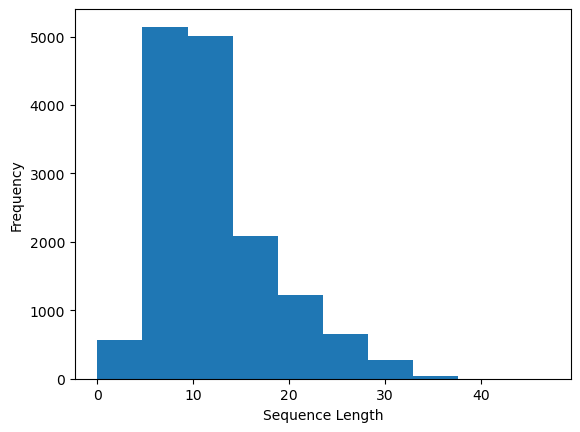

In [101]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataset['Sentence'])
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(dataset['Sentence'])

sequence_length = [len(seq) for seq in sequences]

plt.hist(sequence_length)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

In [102]:
padded = pad_sequences(sequences, maxlen=40)
x_train, x_temp, y_train, y_temp = train_test_split(padded, dataset['Sentiment'], test_size=0.2, random_state=42) 
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [103]:
model = Sequential([
    Embedding(input_dim=len(word_index)+1, output_dim=64),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax'),
])

In [104]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val),
)

Epoch 1/10


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3991 - loss: 1.0878 - val_accuracy: 0.7360 - val_loss: 0.8395
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7419 - loss: 0.6893 - val_accuracy: 0.8240 - val_loss: 0.4482
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8858 - loss: 0.3393 - val_accuracy: 0.8100 - val_loss: 0.4411
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9056 - loss: 0.2509 - val_accuracy: 0.8380 - val_loss: 0.3510
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9233 - loss: 0.1994 - val_accuracy: 0.8867 - val_loss: 0.2877
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9347 - loss: 0.1652 - val_accuracy: 0.8460 - val_loss: 0.3591
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9372 - loss: 0.1564 - val_accuracy: 0.8907 - val_loss: 0.2931
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9395 - loss: 0.1427 - val_accuracy: 0.9100 - val_loss: 0.2841
Epo

Text(0, 0.5, 'Loss')

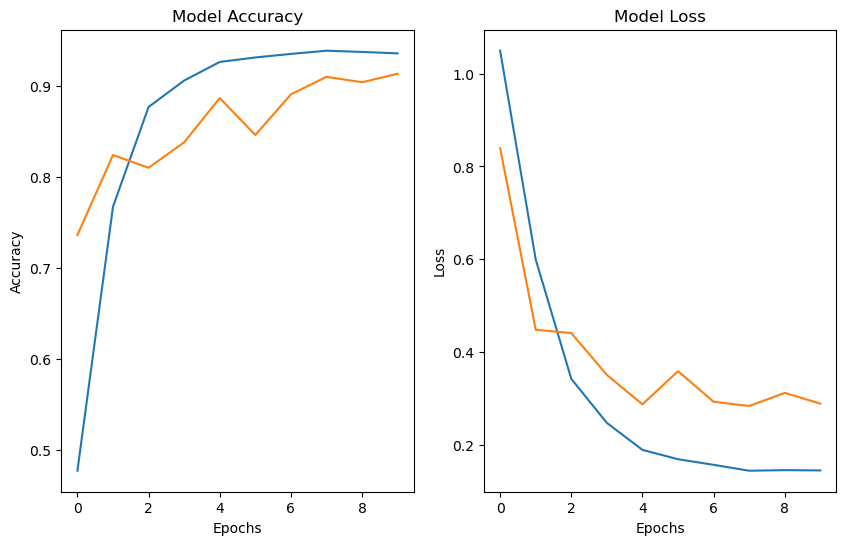

In [106]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [107]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss)
print(accuracy)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9021 - loss: 0.2895
0.29055505990982056
0.903333306312561


In [108]:
# Prediksi 10 data pertama dari X_test
y_pred_classes = np.argmax(model.predict(x_test[:10]), axis=1)

# Menampilkan hasil prediksi dan label aktual
for i in range(10):
    actual_label = y_test.iloc[i]
    predicted_label = y_pred_classes[i]
    print(f"Actual - {actual_label}, Predicted - {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Actual - 2, Predicted - 2
Actual - 0, Predicted - 0
Actual - 2, Predicted - 2
Actual - 2, Predicted - 2
Actual - 1, Predicted - 1
Actual - 2, Predicted - 2
Actual - 1, Predicted - 1
Actual - 0, Predicted - 0
Actual - 2, Predicted - 2
Actual - 2, Predicted - 2


## Session 5: Recurrent Neural Network

### Bahdanau Attention Mechanism

There are many different scores proposed by researchers. The most important ones are:

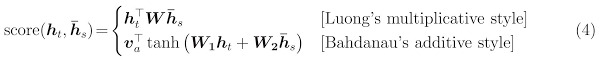

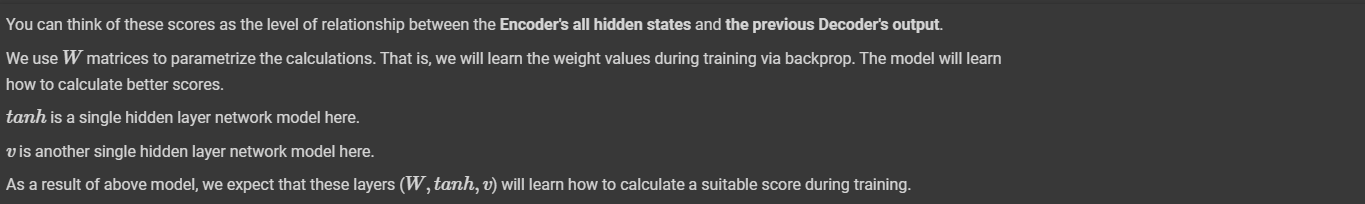

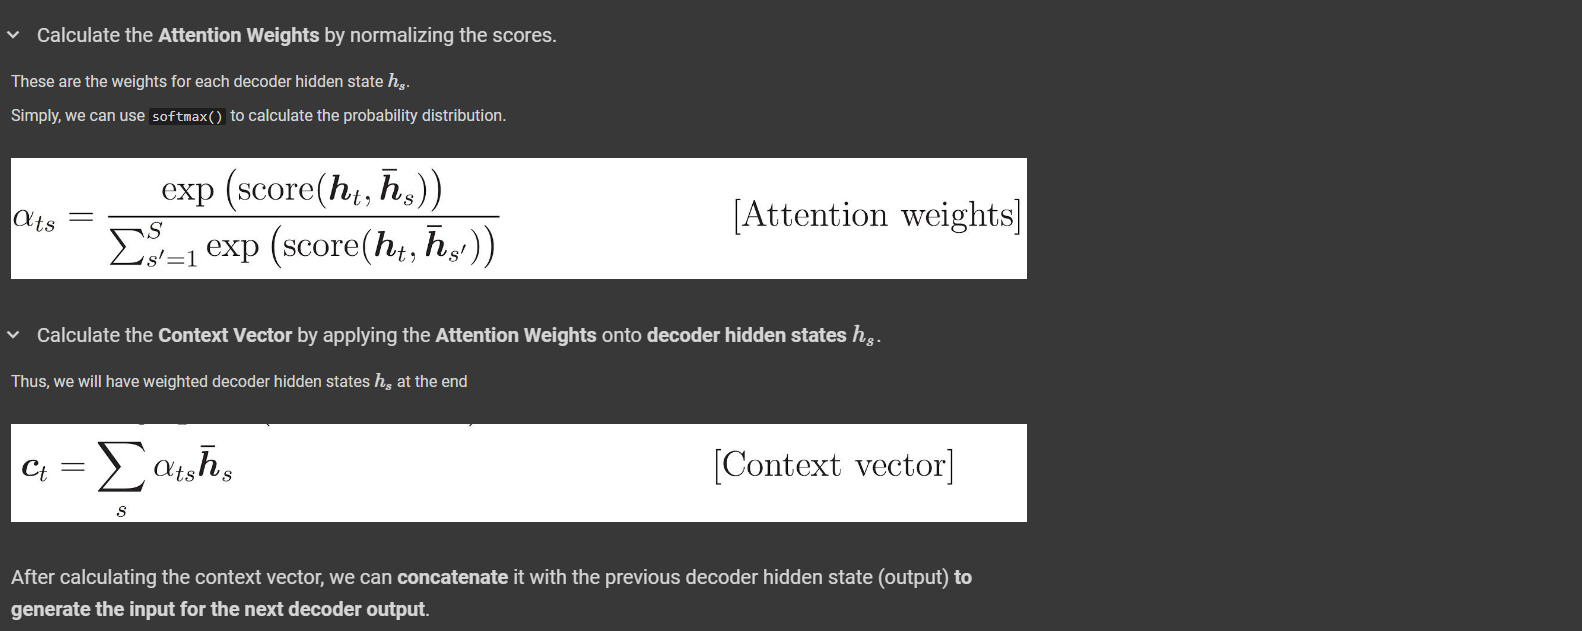

First, I would like to share with you the core code snippet:

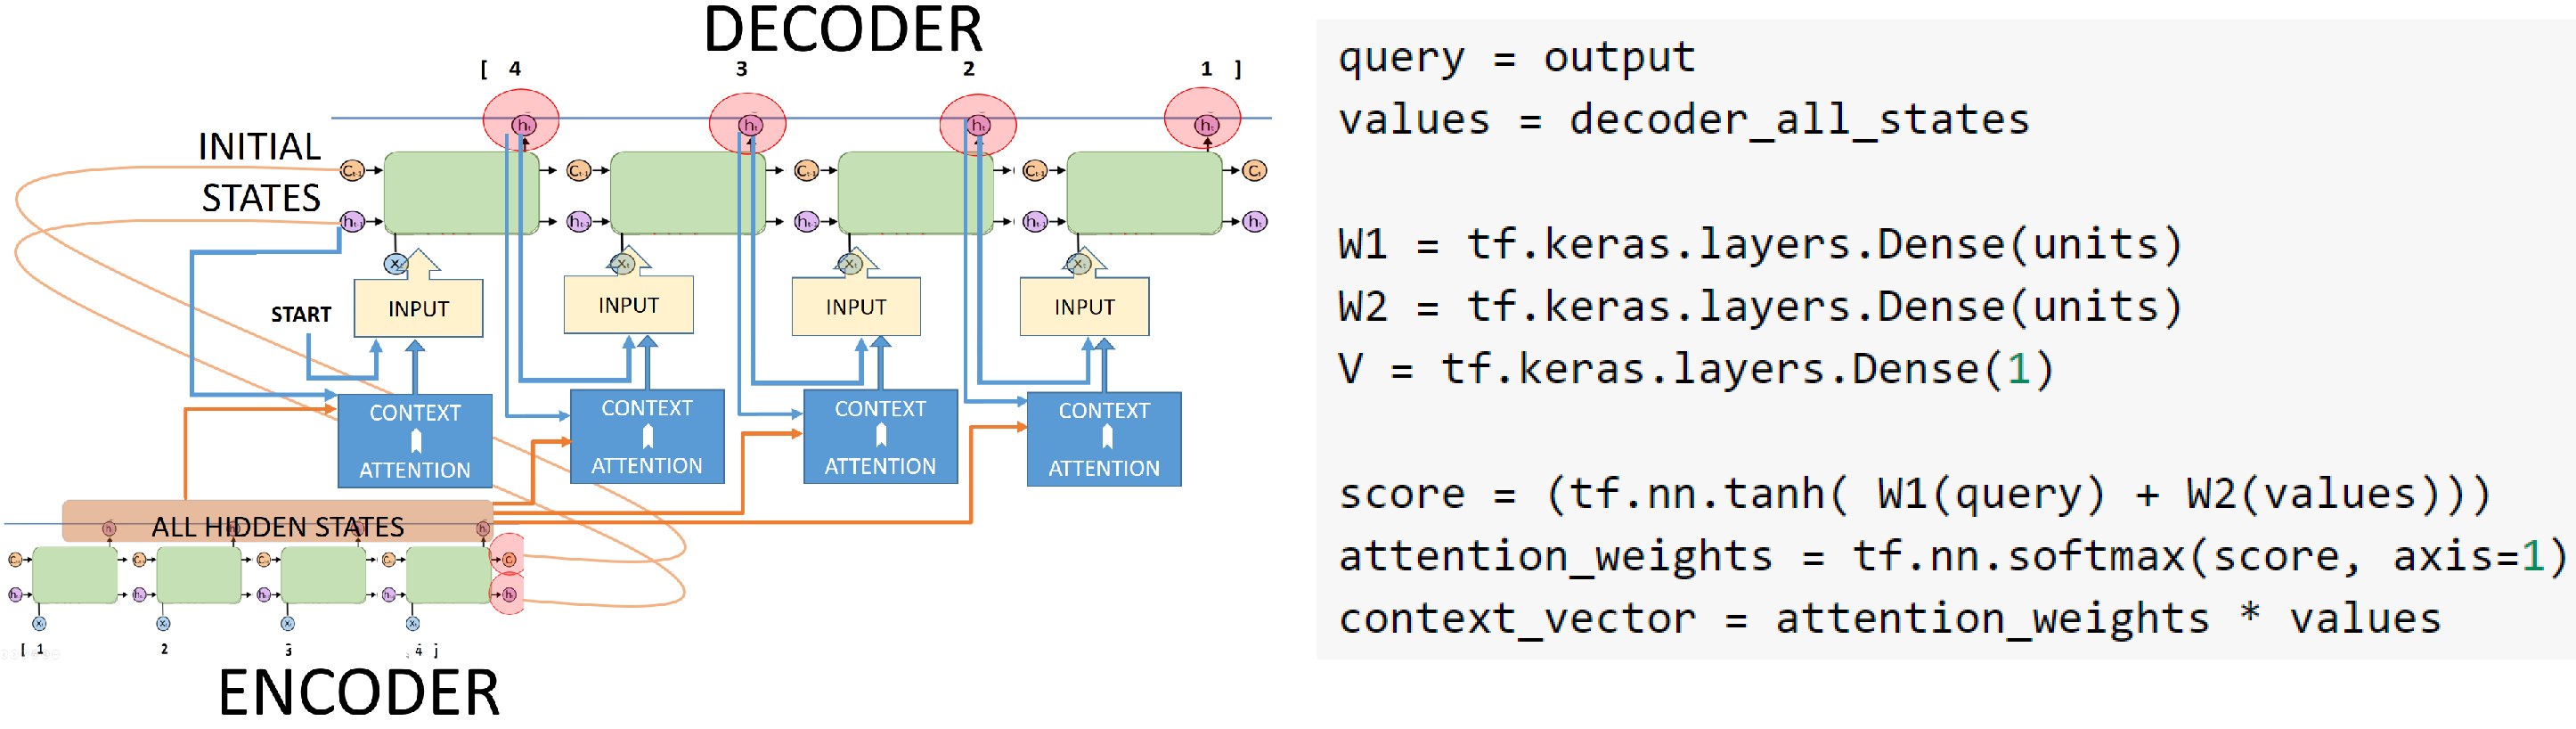

### Code

In [109]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout

In [113]:
################################################################################
# TODO:                                                                        #
# Implement the BahdanauAttention mechanism.                                   #
# This will calculate the context vector and attention weights for a given     #
# query and values using Bahdanau's attention formula.                         #
# 1. Expand the query to have a time axis.                                     #
# 2. Compute the score using the tanh activation function and Dense layers.    #
# 3. Apply the softmax function to calculate the attention weights.            #
# 4. Calculate the context vector as the weighted sum of the values.           #
################################################################################
#Fungsinya memfokuskan kata yang penting untuk ditraining contextnya dari banyak kata dalam dokumen/dataset
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = Dense(units)
        self.W2 = Dense(units)
        self.V = Dense(1)
        return
    
    def call(self, query, values):
        query_time_axis = tf.expand_dims(query, axis=1)
        score = self.V(tf.nn.tanh(self.W1(query_time_axis) + self.W2(values)))
        attention_weights = tf.nn.softmax(score, axis=1)
        
        context_vector = attention_weights * score
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [114]:
def Seq2Seq_model(vocab_size, embedding_dim, lstm_units, attention_units):
    # Encoder input
    encoder_inputs = Input(shape=(None,), name='encoder_inputs')
    embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(encoder_inputs)
    
    # LSTM encoder
    encoder_lstm = LSTM(lstm_units, return_sequences=True, return_state=True, name='encoder_lstm')
    encoder_outputs, encoder_state_h, encoder_state_c = encoder_lstm(embedding)
    
    # Bahdanau attention
    attention = BahdanauAttention(attention_units)
    context_vector, attention_weights = attention(encoder_state_h, encoder_outputs)
    
    # Decoder (fully connected layers)
    dense1 = Dense(128, activation='relu')(context_vector)
    dropout1 = Dropout(0.7)(dense1)
    dense2 = Dense(64, activation='relu')(dropout1)
    dropout2 = Dropout(0.9)(dense2)
    dense3 = Dense(32, activation='relu')(dropout2)
    outputs = Dense(3, activation='softmax')(dense3)
    
    model = Model(inputs=encoder_inputs, outputs=outputs)
    
    return model

In [115]:
vocab_size = len(word_index) + 1
embedding_dim = 64
lstm_units = 64
attention_units = 64

new_model = Seq2Seq_model(vocab_size, embedding_dim, lstm_units, attention_units)

In [117]:
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
new_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_inputs      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, None, 64)  │    751,424 │ encoder_inputs[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_lstm (LSTM) │ [(None, None,     │     33,024 │ embedding_14[0][… │
│                     │ 64), (None, 64),  │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bahdanau_attention  │ [(None, 1),       │      8,385 │ encoder_lstm[0][… │
│ (BahdanauAttention) │ (None, None, 1)]  │            │ encoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 128)       │        256 │ bahdanau_attenti… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 32)        │      2,080 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 3)         │         99 │ dense_21[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 803,524 (3.07 MB)

 Trainable params: 803,524 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Early stopping digunakan untuk mengecek apakah model training datanya sudah bagus dengan menghitung kenaikan function loss

In [119]:
new_history = new_model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/20


375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.3412 - loss: 1.0989 - val_accuracy: 0.4767 - val_loss: 1.0560
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5092 - loss: 0.9927 - val_accuracy: 0.7547 - val_loss: 0.7309
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7608 - loss: 0.6501 - val_accuracy: 0.7933 - val_loss: 0.5701
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8642 - loss: 0.4178 - val_accuracy: 0.8667 - val_loss: 0.4501
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8931 - loss: 0.3210 - val_accuracy: 0.8767 - val_loss: 0.4551
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9000 - loss: 0.2846 - val_accuracy: 0.8787 - val_loss: 0.4605
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9040 - loss: 0.2727 - val_accuracy: 0.8767 - val_loss: 0.4694


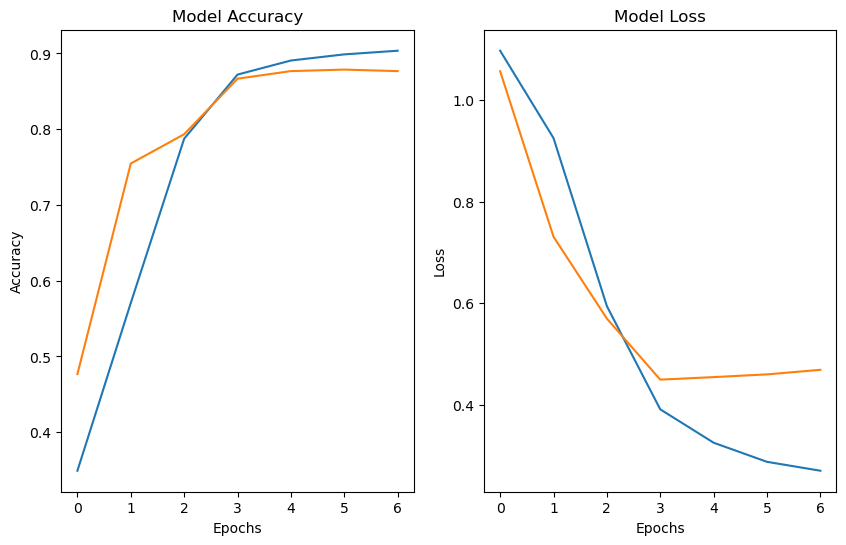

In [120]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(new_history.history['accuracy'], label='Training Accuracy')
plt.plot(new_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(new_history.history['loss'], label='Training Loss')
plt.plot(new_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [121]:
loss, accuracy = new_model.evaluate(x_test, y_test)

print(loss)
print(accuracy)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8504 - loss: 0.4691
0.46246281266212463
0.8546666502952576


In [122]:
y_pred_classes = np.argmax(new_model.predict(x_test[:20]), axis=1)

for i in range(20):
    actual_label = y_test.iloc[i]
    predicted_label = y_pred_classes[i]
    print(f"Actual - {actual_label}, Predicted - {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Actual - 2, Predicted - 2
Actual - 0, Predicted - 0
Actual - 2, Predicted - 2
Actual - 2, Predicted - 2
Actual - 1, Predicted - 1
Actual - 2, Predicted - 2
Actual - 1, Predicted - 1
Actual - 0, Predicted - 0
Actual - 2, Predicted - 2
Actual - 2, Predicted - 2
Actual - 1, Predicted - 0
Actual - 0, Predicted - 0
Actual - 1, Predicted - 1
Actual - 2, Predicted - 2
Actual - 2, Predicted - 2
Actual - 0, Predicted - 0
Actual - 1, Predicted - 1
Actual - 0, Predicted - 0
Actual - 2, Predicted - 2
Actual - 0, Predicted - 0
